In [37]:
import pandas as pd

data = pd.read_csv("../datasets/adult/adult.data",
                   skipinitialspace=True, header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education',
                'education-num', 'marital-status', 'occupation', 
                'relationship', 'race', 'sex', 'capital-gain', 
                'capital-loss', 'hours-per-week', 'native-country', 
                'income']
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


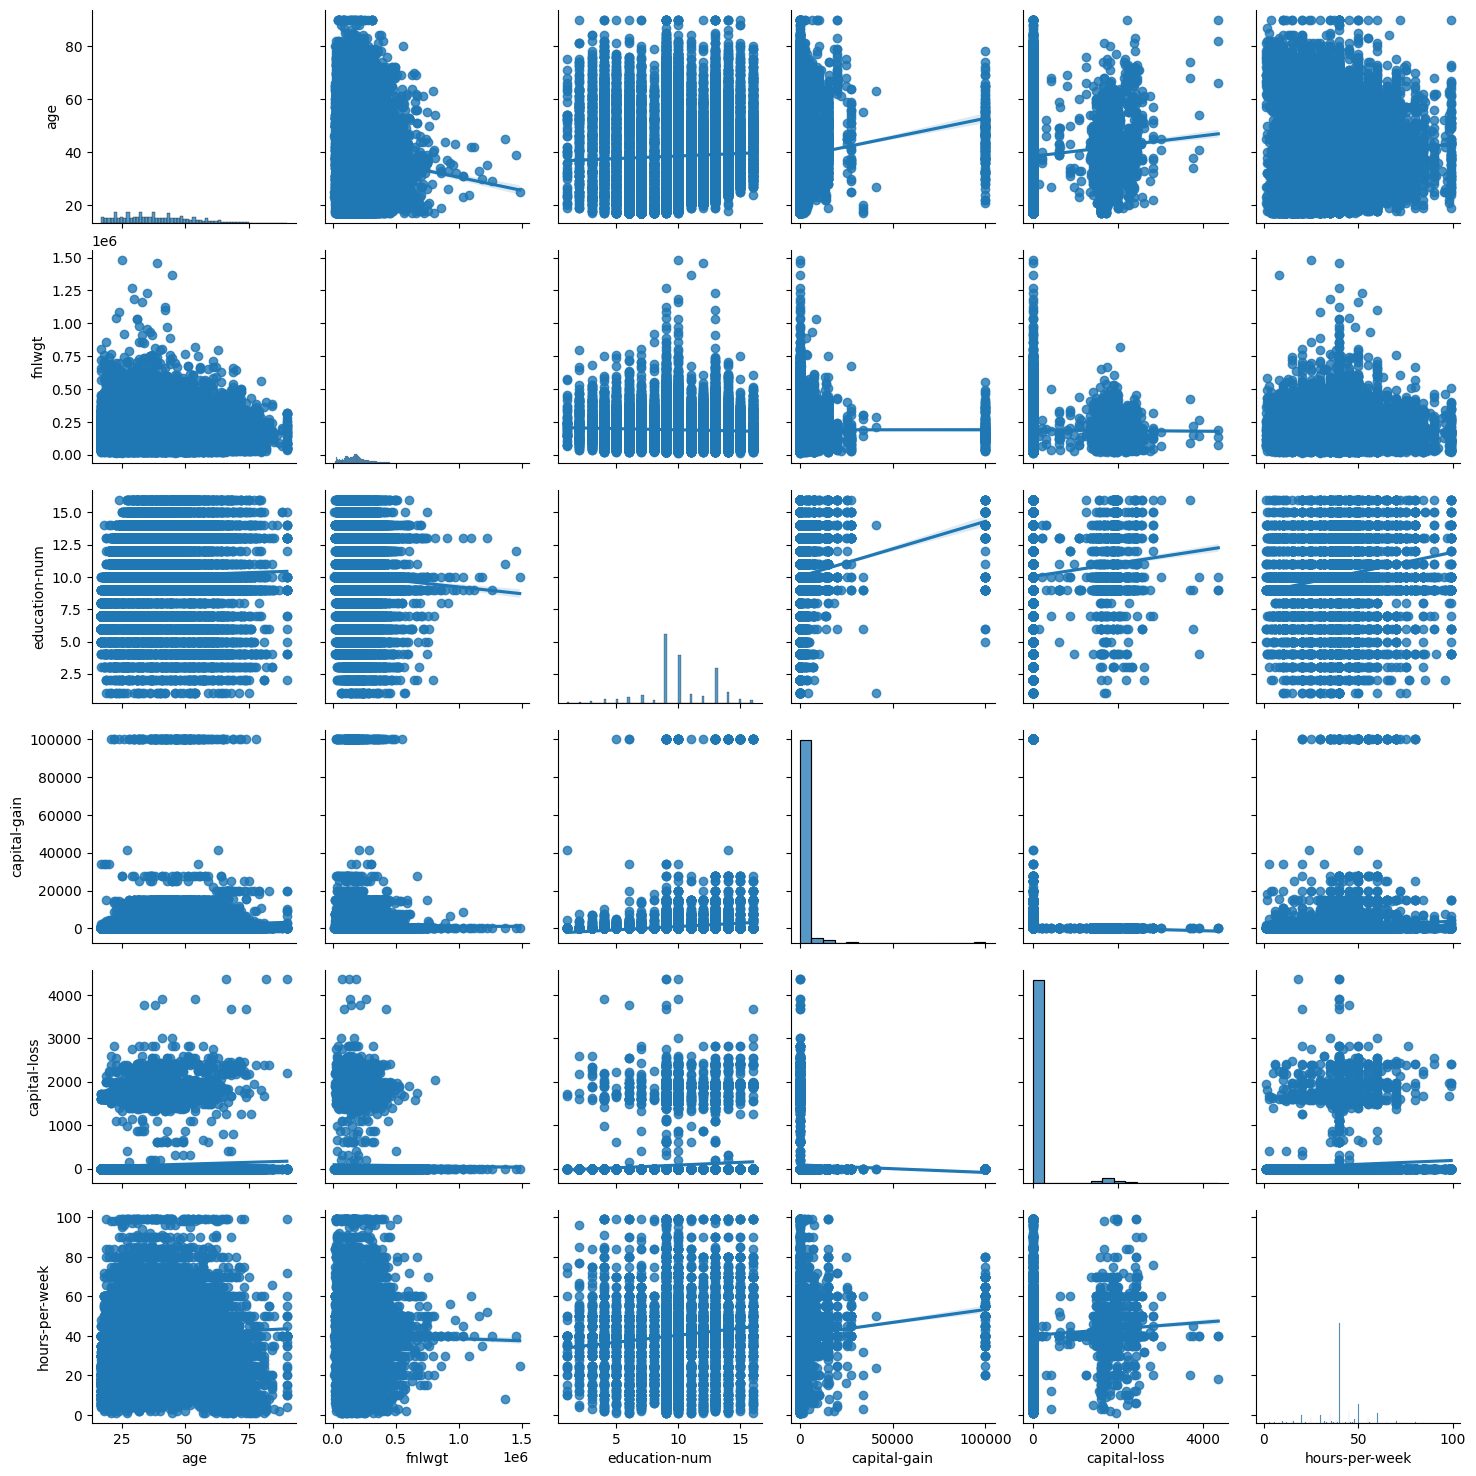

In [3]:
import seaborn as sns
# import matplotlib.pyplot as plt # Für normale py files


sns.pairplot(data, kind="reg")
# plt.show() # Für normale py files

<Axes: xlabel='income', ylabel='Count'>

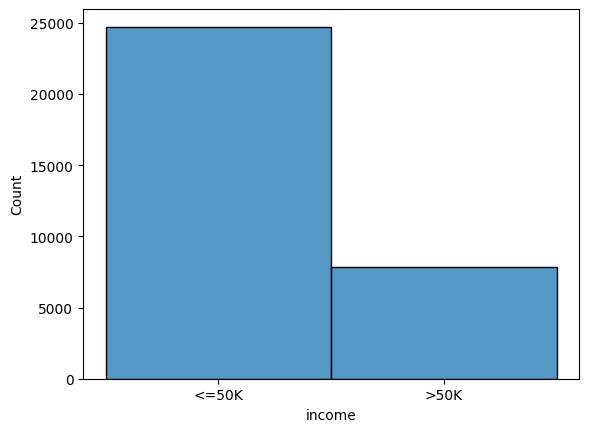

In [5]:
sns.histplot(data, x="income")

In [4]:
import plotly.express as px

px.pie(data, names="income")

In [ ]:
# Einizigartige Werte finden
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
data["income"].isna().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data["education"].drop_duplicates()

0         Bachelors
2           HS-grad
3              11th
5           Masters
6               9th
10     Some-college
13       Assoc-acdm
14        Assoc-voc
15          7th-8th
20        Doctorate
52      Prof-school
56          5th-6th
77             10th
160         1st-4th
224       Preschool
415            12th
Name: education, dtype: object

<Axes: >

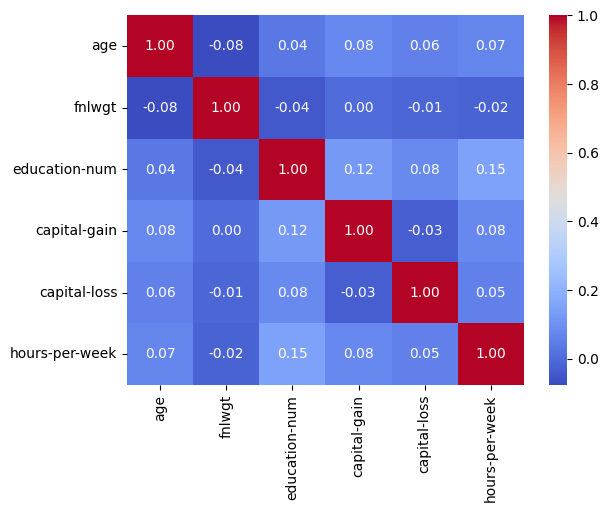

In [ ]:
import seaborn as sns

# Erstelle Korrelationsmatrix
corr_matrix = data.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [ ]:
income_below_50k = data[data["income"] == "<=50K"]
income_above_50k = data[data["income"] == ">50K"]

(array([ 177., 1068., 1843., 1971., 1480.,  847.,  321.,   94.,   29.,
          11.]),
 array([19. , 26.1, 33.2, 40.3, 47.4, 54.5, 61.6, 68.7, 75.8, 82.9, 90. ]),
 <BarContainer object of 10 artists>)

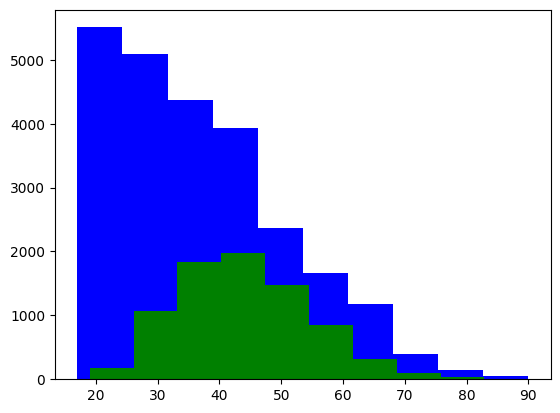

In [17]:
import matplotlib.pyplot as plt

plt.hist(income_below_50k["age"], color="blue")
plt.hist(income_above_50k["age"], color="green")

<Axes: xlabel='age', ylabel='Density'>

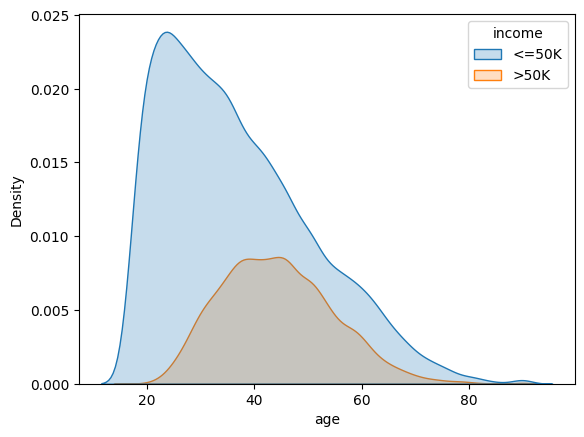

In [34]:
sns.kdeplot(data, x="age", hue="income", fill=True)

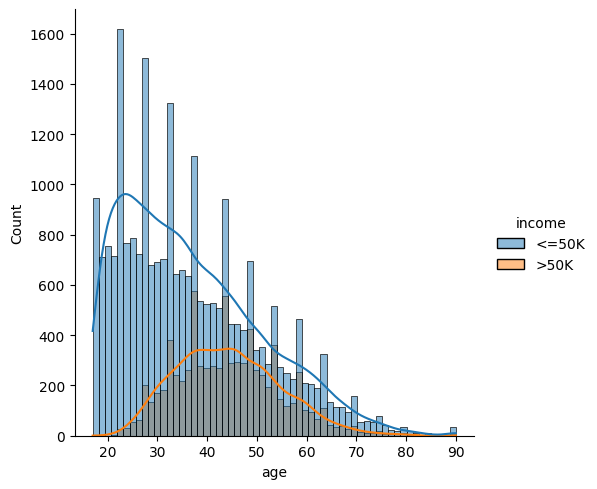

In [ ]:
sns.displot(data, x="age", hue="income", kde=True)

In [40]:
import dtale

dtale.show(data, open_browser=True, port=6253, force=True, host="localhost")

2024-11-12 13:07:14,467 - INFO     - Executing shutdown...
2024-11-12 13:07:14,468 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


2024-11-12 13:11:59,571 - ERROR    - Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "/Users/benedikt/Documents/code/data-science-g5/venv/lib/python3.11/site-packages/dtale/views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/Documents/code/data-science-g5/venv/lib/python3.11/site-packages/dtale/views.py", line 3168, in get_column_analysis
    return jsonify(**analysis.build())
                     ^^^^^^^^^^^^^^^^
  File "/Users/benedikt/Documents/code/data-science-g5/venv/lib/python3.11/site-packages/dtale/column_analysis.py", line 141, in build
    return_data, code = self.analysis.build(self)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/benedikt/Documents/code/data-science-g5/venv/lib/python